In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

## Score

In [2]:
MedMCQA_res = pd.read_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/MedMCQA/combined_results_evaluation.csv")
PubMedQA_res = pd.read_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/combined_results_evaluation.csv")
GOTerm_res = pd.read_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/GOTerm/combined_results_evaluation.csv")
annotation_res = pd.read_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/annotation/combined_results_evaluation.csv")

In [3]:
MedMCQA_res['task'] = 'MedMCQA Evaluation'
PubMedQA_res['task'] = 'PubMedQA Evaluation'
GOTerm_res['task'] = 'Gene Set Function Definition'
annotation_res['task'] = 'Cell Type Annotation'

In [4]:
MedMCQA_res['score'] = MedMCQA_res['accuracy']
PubMedQA_res['score'] = PubMedQA_res['accuracy']
annotation_res['score'] = annotation_res['final_score']

In [5]:
res_score = pd.concat([MedMCQA_res[['task', 'score', 'model']], PubMedQA_res[['task', 'score', 'model']], GOTerm_res[['task', 'score', 'model']], annotation_res[['task', 'score', 'model']]], axis=0, ignore_index=True)
# Replace specific strings in the 'model' column
res_score['model'] = res_score['model'].replace({
    'Qwen/Qwen2.5-72B-Instruct': 'Qwen2.5-72B',  
    'deepseek-ai/DeepSeek-R1-Distill-Llama-8B': 'Distill-Llama-8B',
    'deepseek-ai/DeepSeek-R1-Distill-Qwen-7B': 'Distill-Qwen-7B',  
    'deepseek-chat': 'DeepSeek-V3',
    'deepseek-reasoner': 'DeepSeek-R1',  
    'meta-llama/Meta-Llama-3.1-405B-Instruct': 'Llama-3.1-405B',
    'gpt-4o': 'GPT-4o'
})


In [6]:
res_score.to_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/all_results_evaluation.csv", index=False)

In [7]:
res_score.groupby(['task', 'model']).mean().round(3).reset_index().to_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/overall_results_evaluation_summary.csv")

In [8]:
res_score.groupby(['task', 'model']).mean().round(3).reset_index()

,task,model,score
0,Cell Type Annotation,DeepSeek-R1,0.668
1,Cell Type Annotation,DeepSeek-V3,0.614
2,Cell Type Annotation,Distill-Llama-8B,0.432
3,Cell Type Annotation,Distill-Qwen-7B,0.380
4,Cell Type Annotation,GPT-4o,0.608
5,Cell Type Annotation,Llama-3.1-405B,0.668
6,Cell Type Annotation,Qwen2.5-72B,0.623
7,Gene Set Function Definition,DeepSeek-R1,0.489
8,Gene Set Function Definition,DeepSeek-V3,0.426
9,Gene Set Function Definition,Distill-Llama-8B,0.399


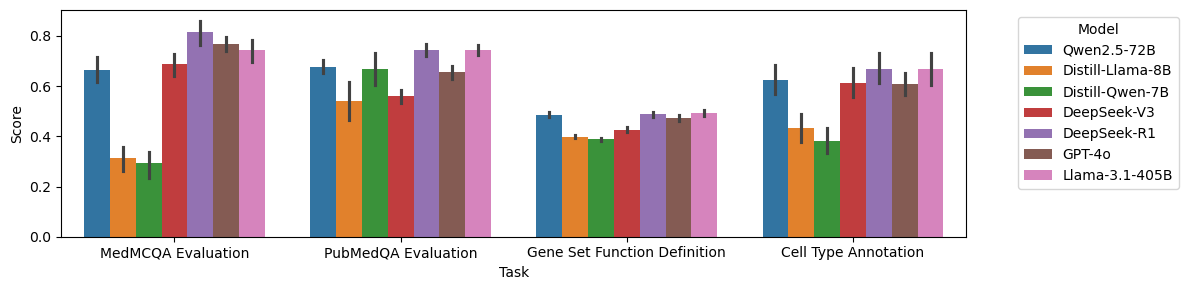

In [9]:
plt.figure(figsize=(12, 3))
sns.barplot(
    data=res_score,
    x="task",
    y="score",
    hue="model",
    estimator=np.mean,
    errorbar=("ci", 95)  # This adds error bars representing 95% confidence intervals
)

plt.xlabel("Task")
plt.ylabel("Score")
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/Users/linxy29/Documents/Data/GeneRAG/benchmark/overall_performance.pdf')
plt.show()

## Run time

In [18]:
MedMCQA_res = pd.read_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/MedMCQA/combined_results.csv")
PubMedQA_res = pd.read_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/PubMedQA/combined_results.csv")
GOTerm_res = pd.read_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/GOTerm/combined_results.csv")
annotation_res = pd.read_csv("/Users/linxy29/Documents/Data/GeneRAG/benchmark/annotation/combined_results_evaluation.csv")

In [19]:
MedMCQA_res['task'] = 'MedMCQA Evaluation'
PubMedQA_res['task'] = 'PubMedQA Evaluation'
GOTerm_res['task'] = 'Gene Set Function Definition'
annotation_res['task'] = 'Cell Type Annotation'

In [20]:
MedMCQA_res = MedMCQA_res[MedMCQA_res['answer'].notna()]
MedMCQA_sample = MedMCQA_res.groupby('model').sample(n=60, replace=False)
PubMedQA_res = PubMedQA_res[PubMedQA_res['answer'].notna()]
PubMedQA_res['engine'] = PubMedQA_res['engine'].fillna('null')
PubMedQA_sample = PubMedQA_res.groupby(['model', 'engine']).sample(n=30, replace=False)
#PubMedQA_sample = PubMedQA_res.groupby(['model', 'engine']).sample(n=30, replace=True)
GOTerm_res = GOTerm_res[GOTerm_res['answer'].notna()]
GOTerm_sample = GOTerm_res.groupby('model').sample(n=60, replace=False)
annotation_res = annotation_res[annotation_res['answer'].notna()]
annotation_sample = annotation_res.groupby('model').sample(n=60, replace=True)

In [21]:
res_time = pd.concat([MedMCQA_res[['task', 'time_taken', 'model']], PubMedQA_res[['task', 'time_taken', 'model']], GOTerm_res[['task', 'time_taken', 'model']], annotation_res[['task', 'time_taken', 'model']]], axis=0, ignore_index=True)
# Replace specific strings in the 'model' column
res_time['model'] = res_time['model'].replace({
    'Qwen/Qwen2.5-72B-Instruct': 'Qwen2.5-72B',  
    'deepseek-ai/DeepSeek-R1-Distill-Llama-8B': 'Distill-Llama-8B',
    'deepseek-ai/DeepSeek-R1-Distill-Qwen-7B': 'Distill-Qwen-7B',  
    'deepseek-chat': 'DeepSeek-V3',
    'deepseek-reasoner': 'DeepSeek-R1',  
    'meta-llama/Meta-Llama-3.1-405B-Instruct': 'Llama-3.1-405B',
    'gpt-4o': 'GPT-4o'
})

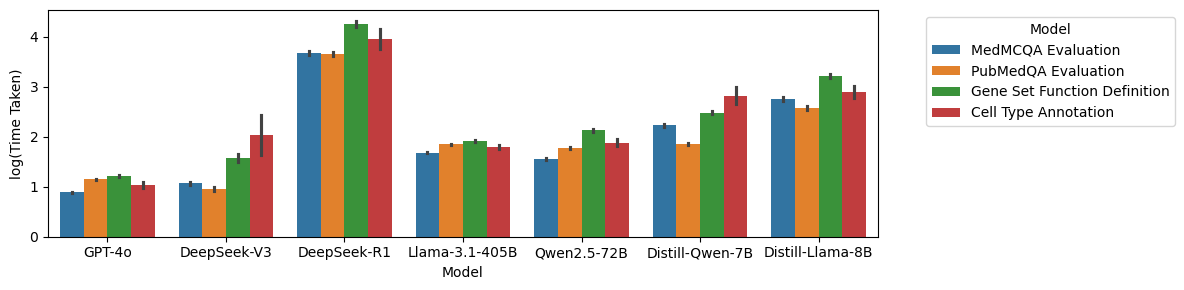

In [22]:
res_time['log_time'] = np.log(res_time['time_taken'])
plt.figure(figsize=(12, 3))
sns.barplot(
    data=res_time,
    x="model",
    y="log_time",
    hue="task",
    estimator=np.mean,
    errorbar=("ci", 95)  # This adds error bars representing 95% confidence intervals
)

plt.xlabel("Model")
plt.ylabel("log(Time Taken)")
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/Users/linxy29/Documents/Data/GeneRAG/benchmark/overall_time.pdf')
plt.show()

In [23]:
res_time.groupby(['task', 'model'])['log_time'].mean().round(3).reset_index()

,task,model,log_time
0,Cell Type Annotation,DeepSeek-R1,3.954
1,Cell Type Annotation,DeepSeek-V3,2.029
2,Cell Type Annotation,Distill-Llama-8B,2.900
3,Cell Type Annotation,Distill-Qwen-7B,2.817
4,Cell Type Annotation,GPT-4o,1.038
5,Cell Type Annotation,Llama-3.1-405B,1.796
6,Cell Type Annotation,Qwen2.5-72B,1.884
7,Gene Set Function Definition,DeepSeek-R1,4.261
8,Gene Set Function Definition,DeepSeek-V3,1.576
9,Gene Set Function Definition,Distill-Llama-8B,3.219


In [24]:
res_time.groupby(['task', 'model'])['log_time'].mean().round(3).reset_index().to_csv("/Users/linxy29/Documents/Dat·                                            a/GeneRAG/benchmark/overall_results_time_summary.csv")

## Combine plots

/var/folders/mv/5359mrfx7yq8dl6fs3p4gy000000gn/T/ipykernel_64375/3877553871.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels())
/var/folders/mv/5359mrfx7yq8dl6fs3p4gy000000gn/T/ipykernel_64375/3877553871.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels())


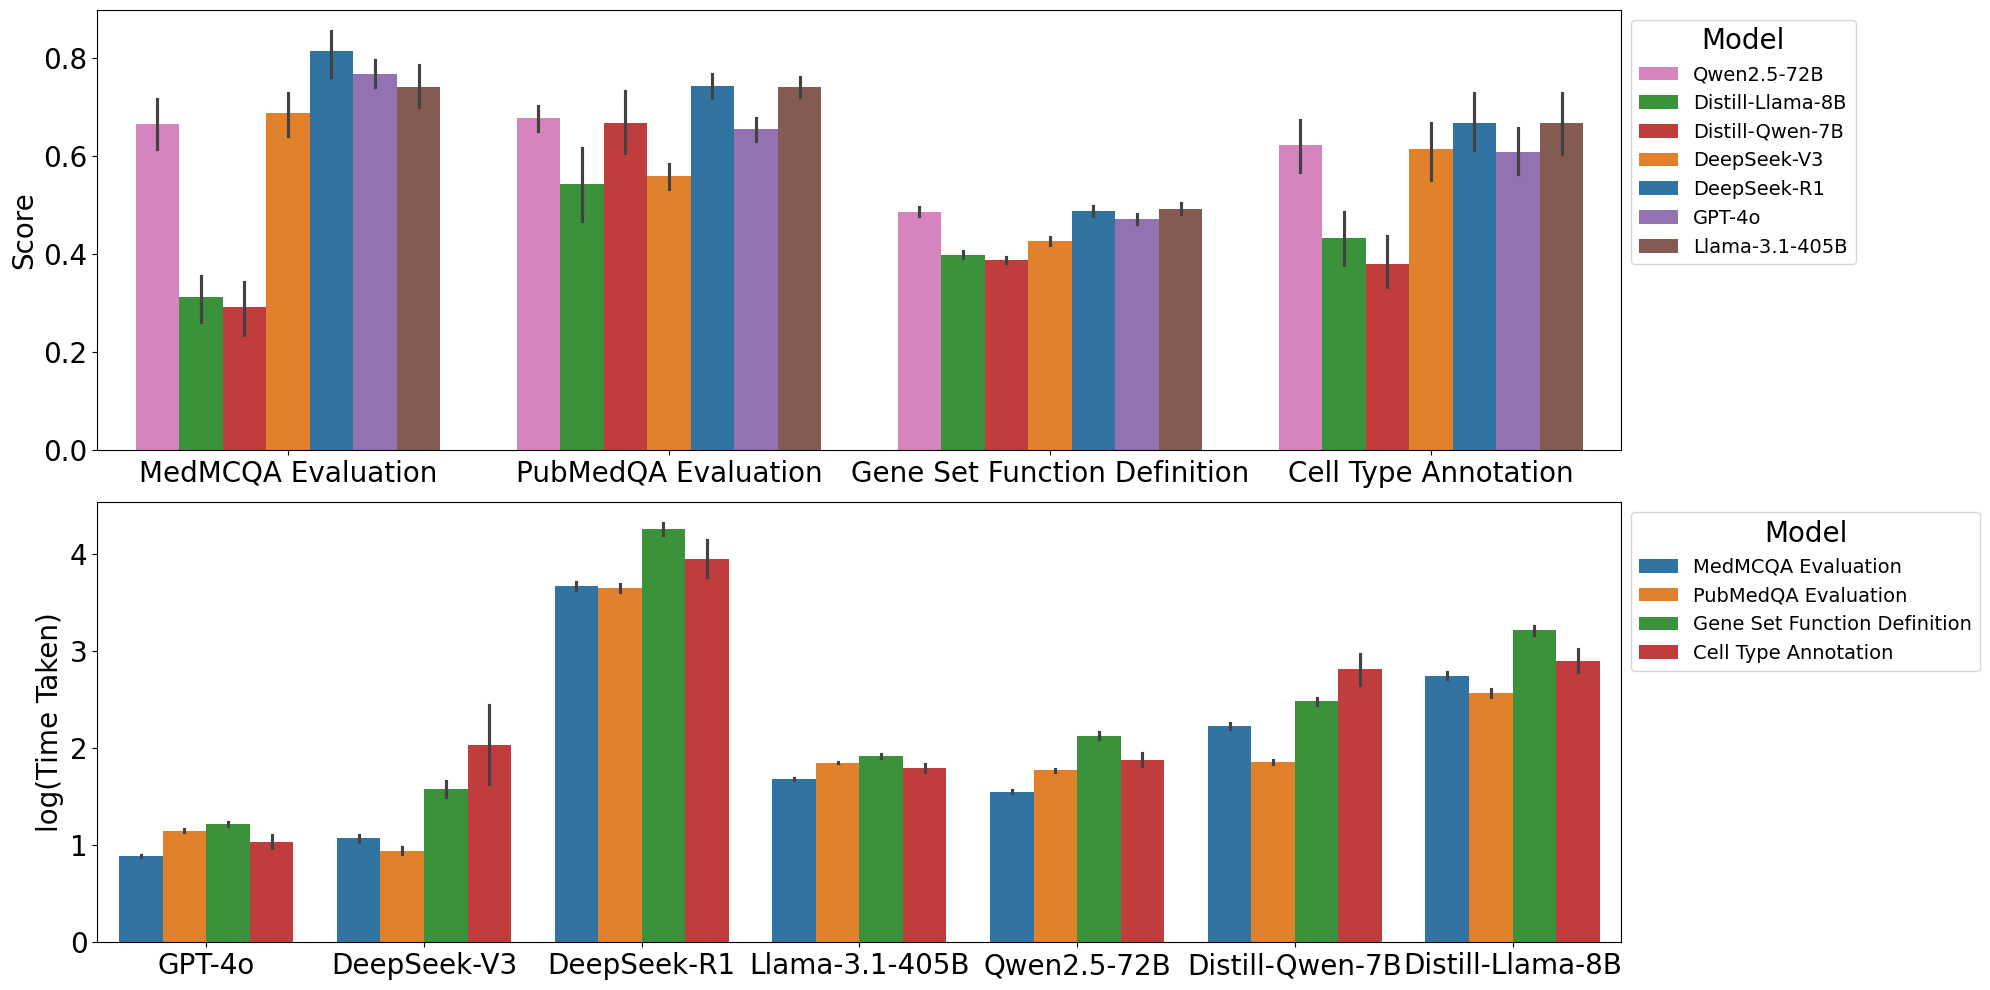

In [38]:
# Create 2x2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
fig.subplots_adjust(wspace=0.4,  # space between columns
                    hspace=0.6)  # space between rows

# Define a consistent palette for models (using models from acc_df as an example)
models = sorted(res_score['model'].unique())
palette = sns.color_palette("tab10", n_colors=len(models))
color_map = dict(zip(models, palette))

## Subplot 1: Overall performance
ax1.tick_params(axis='both', which='major', labelsize=20)
# Define a consistent order for models (alphabetical order here)
model_order = sorted(res_score['model'].unique())
sns.barplot(
    data=res_score,
    x="task",
    y="score",
    hue="model",
    estimator=np.mean,
    errorbar=("ci", 95),
    palette=color_map,
    ax=ax1
)
ax1.set_ylabel('Score', fontsize=20)
ax1.set_xlabel("")
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left', fontsize=14, title_fontsize=20)

# Subplot 2: Time taken
ax2.tick_params(axis='both', which='major', labelsize=20)
sns.barplot(
    data=res_time,
    x="model",
    y="log_time",
    hue="task",
    estimator=np.mean,
    errorbar=("ci", 95),
    ax=ax2
)
ax2.set_ylabel('log(Time Taken)', fontsize=20)
ax2.set_xlabel("")
ax2.set_xticklabels(ax2.get_xticklabels())
ax2.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left', fontsize=14, title_fontsize=20)

plt.tight_layout()
plt.savefig('/Users/linxy29/Documents/Data/GeneRAG/benchmark/overall_performance_and_time.pdf')
plt.show()
